In [2]:
import sys
sys.path.append("../")

In [3]:
import torch
from kan import KAN
from kan.utils import create_dataset
import matplotlib.pyplot as plt

In [12]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

# initialize KAN with G=3
model = KAN(width=[2,1,1], grid=3, k=3, seed=1, device=device)

# create dataset
f = lambda x: torch.exp(torch.sin(torch.pi*x[:,[0]]) + x[:,[1]]**2)
dataset = create_dataset(f, n_var=2, device=device)

cuda
checkpoint directory created: ./model
saving model version 0.0


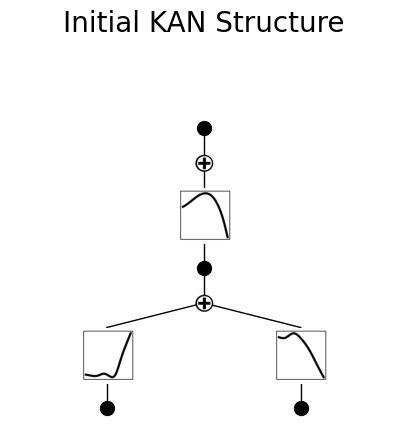

In [14]:
# Generate dummy input data for initialization plot
dummy_input = torch.randn(100, 2, device=device)  # Batch size 100, 2 features

# Forward pass to populate activation data
_ = model(dummy_input)

# Plot initial KAN structure
model.plot(beta=10, title='Initial KAN Structure')

In [15]:
model.fit(dataset, opt="LBFGS", steps=20)

| train_loss: 1.35e-02 | test_loss: 1.38e-02 | reg: 1.18e+01 | : 100%|█| 20/20 [00:10<00:00,  1.91it

saving model version 0.1


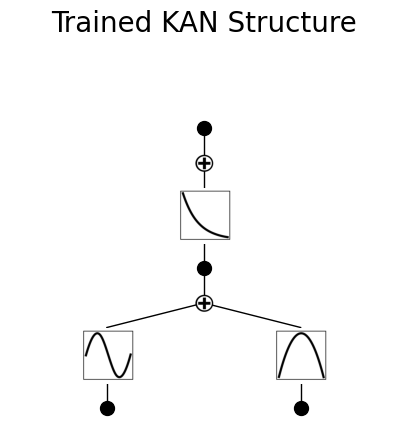

In [16]:
# Plot trained KAN
model.plot(beta=10, title='Trained KAN Structure')

saving model version 0.2


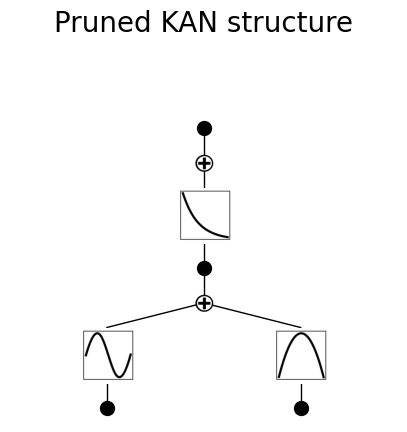

In [17]:
# Prune the network
model = model.prune()
model.plot(beta=10, title='Pruned KAN structure')

cuda
checkpoint directory created: ./model
saving model version 0.0


description:   0%|                                                          | 0/200 [00:00<?, ?it/s]

| train_loss: 1.35e-02 | test_loss: 1.39e-02 | reg: 1.11e+01 | : 100%|█| 200/200 [00:37<00:00,  5.38


saving model version 0.1
saving model version 0.2


| train_loss: 7.28e-03 | test_loss: 7.21e-03 | reg: 1.11e+01 | : 100%|█| 200/200 [00:32<00:00,  6.17


saving model version 0.3
saving model version 0.4


| train_loss: 4.83e-04 | test_loss: 4.95e-04 | reg: 1.11e+01 | : 100%|█| 200/200 [00:37<00:00,  5.37


saving model version 0.5
saving model version 0.6


| train_loss: 8.29e-05 | test_loss: 1.33e-04 | reg: 1.11e+01 | : 100%|█| 200/200 [00:28<00:00,  7.04


saving model version 0.7
saving model version 0.8


| train_loss: 2.99e-05 | test_loss: 6.61e-05 | reg: 1.11e+01 | : 100%|█| 200/200 [00:28<00:00,  6.99


saving model version 0.9
saving model version 0.10


| train_loss: 2.19e-05 | test_loss: 6.82e-05 | reg: 1.11e+01 | : 100%|█| 200/200 [00:14<00:00, 13.49


saving model version 0.11


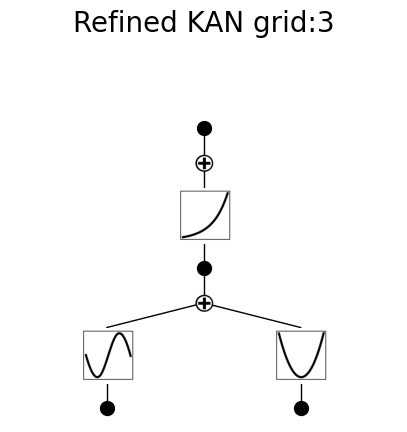

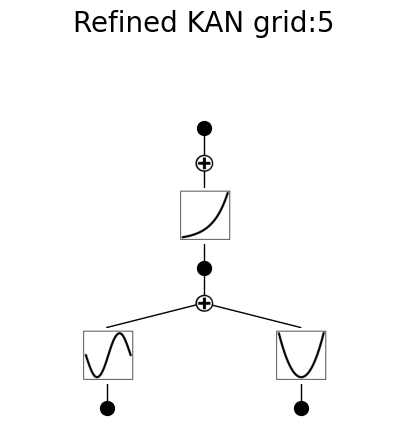

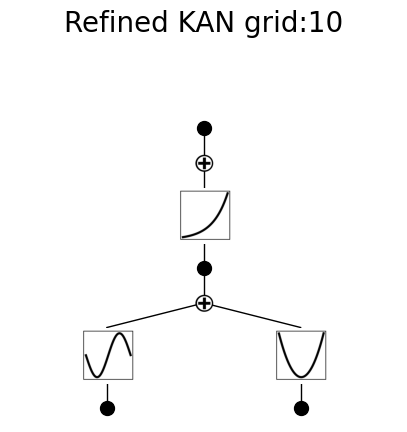

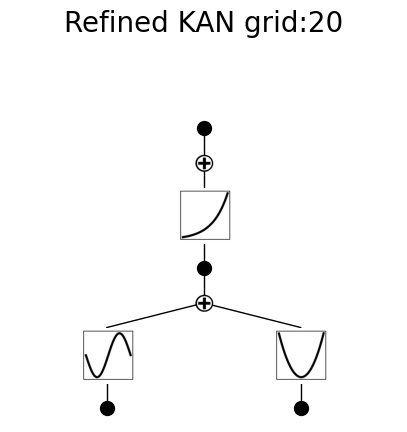

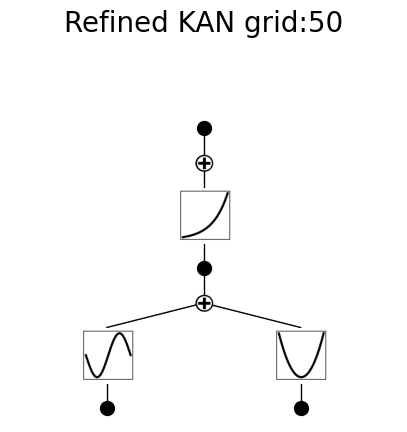

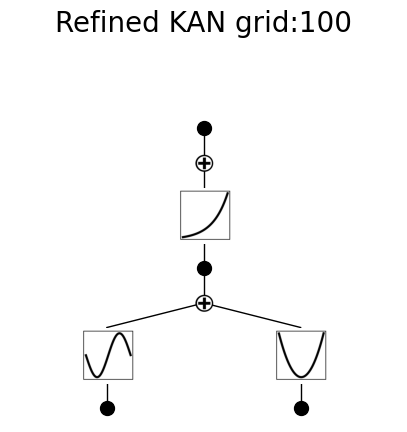

In [20]:
from kan import *

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

# create dataset
f = lambda x: torch.exp(torch.sin(torch.pi*x[:,[0]]) + x[:,[1]]**2)
dataset = create_dataset(f, n_var=2, device=device, train_num=1000)


grids = np.array([3,5,10,20,50,100])
#grids = np.array([3,10])


train_losses = []
test_losses = []
steps = 200
k = 3

for i in range(grids.shape[0]):
    if i == 0:
        model = KAN(width=[2,1,1], grid=grids[i], k=k, seed=0, device=device)
    if i != 0:
        model = model.refine(grids[i])
    results = model.fit(dataset, opt="LBFGS", steps=steps)
    train_losses += results['train_loss']
    test_losses += results['test_loss']

    model.plot(beta=10, title=f'Refined KAN grid:{grids[i]}')
    

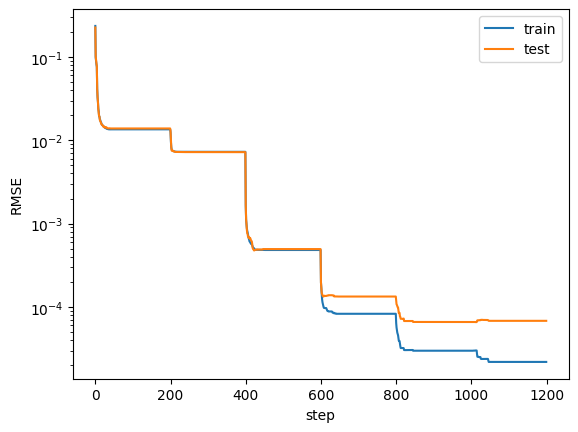

In [21]:
plt.plot(train_losses)
plt.plot(test_losses)
plt.legend(['train', 'test'])
plt.ylabel('RMSE')
plt.xlabel('step')
plt.yscale('log')

Text(0, 0.5, 'RMSE')

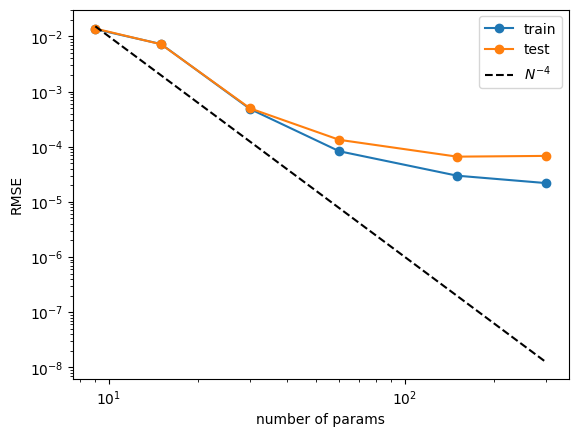

In [22]:
n_params = 3 * grids
train_vs_G = train_losses[(steps-1)::steps]
test_vs_G = test_losses[(steps-1)::steps]
plt.plot(n_params, train_vs_G, marker="o")
plt.plot(n_params, test_vs_G, marker="o")
plt.plot(n_params, 100*n_params**(-4.), ls="--", color="black")
plt.xscale('log')
plt.yscale('log')
plt.legend(['train', 'test', r'$N^{-4}$'])
plt.xlabel('number of params')
plt.ylabel('RMSE')